In [1]:
import pandas
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
boxScore = pandas.read_csv("nba-enhanced-stats/2012-18_officialBoxScore.csv")
boxScore

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
5,2012-10-30,19:00,Regular,Workman,Haywoode,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
6,2012-10-30,20:00,Regular,McCutchen,Monty,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
7,2012-10-30,20:00,Regular,Wright,Sean,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
8,2012-10-30,20:00,Regular,Fitzgerald,Kane,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
9,2012-10-30,20:00,Regular,McCutchen,Monty,MIA,East,Southeast,Home,Win,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832


In [3]:
playerBox = pandas.read_csv("nba-enhanced-stats/2012-18_playerBoxScore.csv")
playerBox

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0000,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5000,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5000,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0000,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0000,1,0,1,CLE,East,Central,Home,Win,0
5,2012-10-30,19:00,Regular,Crawford,Jordan,WAS,East,Southeast,Away,Loss,...,0.7500,1,2,3,CLE,East,Central,Home,Win,0
6,2012-10-30,19:00,Regular,Webster,Martell,WAS,East,Southeast,Away,Loss,...,0.0000,0,3,3,CLE,East,Central,Home,Win,0
7,2012-10-30,19:00,Regular,Vesely,Jan,WAS,East,Southeast,Away,Loss,...,0.2500,3,1,4,CLE,East,Central,Home,Win,0
8,2012-10-30,19:00,Regular,Singleton,Chris,WAS,East,Southeast,Away,Loss,...,0.0000,2,2,4,CLE,East,Central,Home,Win,0
9,2012-10-30,19:00,Regular,Barron,Earl,WAS,East,Southeast,Away,Loss,...,0.0000,4,4,8,CLE,East,Central,Home,Win,0


In [4]:
teamBox = pandas.read_csv("nba-enhanced-stats/2012-18_teamBoxScore.csv")
teamBox

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790
5,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,LAL,...,60.2083,108.1034,99.3678,8.7356,0.4545,17.3338,1.8333,75.0000,91.5790,91.5790
6,2012-10-31,19:00,Regular,Salvatore,Bennett,Brown,Tony,Lewis,Eric,DEN,...,58.4375,89.0099,79.4731,9.5368,0.3448,14.0362,1.1250,81.2500,94.3715,94.3715
7,2012-10-31,19:00,Regular,Salvatore,Bennett,Brown,Tony,Lewis,Eric,PHI,...,41.1458,79.4731,89.0099,-9.5368,0.3511,14.1961,0.8636,40.9091,94.3715,94.3715
8,2012-10-31,19:00,Regular,Spooner,Bill,Guthrie,David,Lindsay,Mark,IND,...,55.7292,96.1075,98.2918,-2.1843,0.3837,14.1332,1.8000,120.0000,91.5641,91.5641
9,2012-10-31,19:00,Regular,Spooner,Bill,Guthrie,David,Lindsay,Mark,TOR,...,58.5417,98.2918,96.1075,2.1843,0.4205,17.4548,1.1579,15.7895,91.5641,91.5641


In [5]:
home_away = boxScore[['teamAbbr', 'opptAbbr', 'teamLoc', 'teamPTS', 'opptPTS']]
ptDiff = list(home_away['teamPTS'] - home_away['opptPTS'])
home_away['ptDiff'] = ptDiff
home_away


C:\Users\georg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,teamAbbr,opptAbbr,teamLoc,teamPTS,opptPTS,ptDiff
0,WAS,CLE,Away,84,94,-10
1,WAS,CLE,Away,84,94,-10
2,WAS,CLE,Away,84,94,-10
3,CLE,WAS,Home,94,84,10
4,CLE,WAS,Home,94,84,10
5,CLE,WAS,Home,94,84,10
6,BOS,MIA,Away,107,120,-13
7,BOS,MIA,Away,107,120,-13
8,BOS,MIA,Away,107,120,-13
9,MIA,BOS,Home,120,107,13


In [18]:
home_away['ptDiff'].groupby(home_away['teamLoc']).mean()

teamLoc
Away   -2.691762
Home    2.691762
Name: ptDiff, dtype: float64

In [20]:
home_away_means = home_away['ptDiff'].groupby((home_away['teamLoc'], home_away['teamAbbr'])).mean().
home_away_means

C:\Users\georg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


teamLoc  teamAbbr
Away     ATL         -1.337398
         BKN         -4.947154
         BOS         -1.333333
         CHA         -4.478969
         CHI         -2.837618
         CLE         -1.480379
         DAL         -2.861976
         DEN         -3.695122
         DET         -4.674797
         GS           4.036585
         HOU          1.700542
         IND         -1.689796
         LAC          1.808943
         LAL         -8.159675
         MEM         -2.166667
         MIA         -0.292683
         MIL         -4.154472
         MIN         -4.422192
         NO          -4.203252
         NY          -5.178862
         OKC          1.317073
         ORL         -7.378049
         PHI         -7.857724
         PHO         -6.800813
         POR         -2.066306
         SA           3.967480
         SAC         -6.621951
         TOR          1.174797
         UTA         -2.983740
         WAS         -3.126016
Home     ATL          2.223577
         BKN         

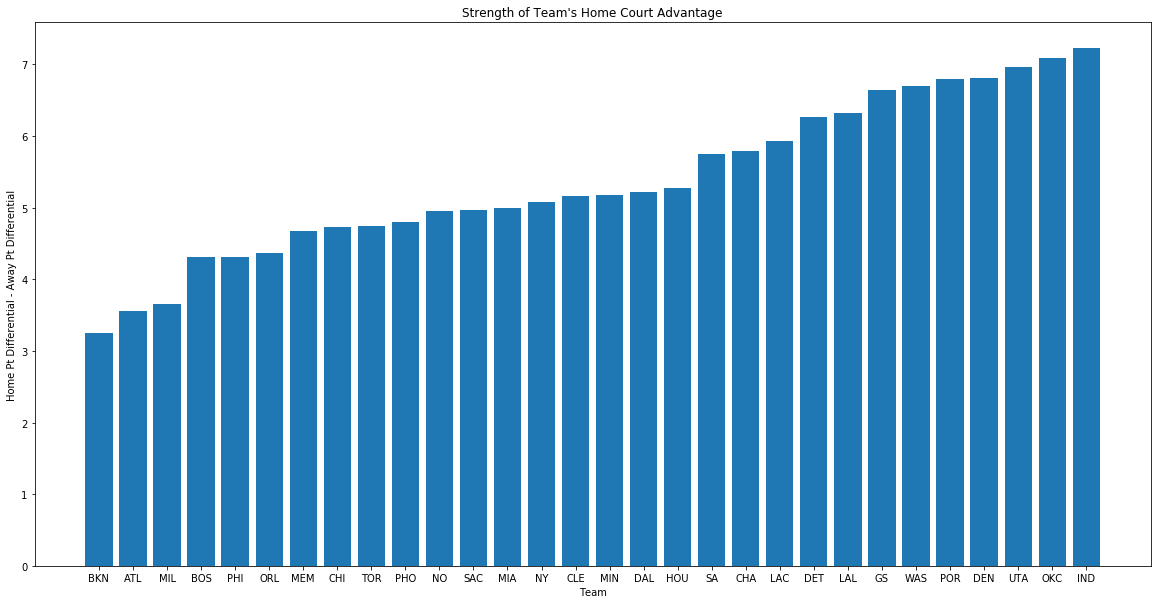

In [87]:
team_names = sorted(home_away['teamAbbr'].unique())
HADiff = {}
for i in range(30):
    HADiff[team_names[i]] = home_away_means[30 + i] - home_away_means[i]
    
sorted_list_HADiff = sorted(HADiff.items(), key = lambda kv:kv[1])

fig = plt.figure(figsize=(20,10))
ax = plt.axes()

plt.bar(range(30), [val[1] for val in sorted_list_HADiff], align='center')
plt.xticks(range(30), [val[0] for val in sorted_list_HADiff])
plt.title("Strength of Team's Home Court Advantage")
plt.xlabel("Team")
plt.ylabel("Home Pt Differential - Away Pt Differential")
plt.show()

[('BKN', 3.252032520325203), ('ATL', 3.5609756097560976), ('MIL', 3.655148134701915), ('BOS', 4.303401360544218), ('PHI', 4.317073170731707), ('ORL', 4.369918699186991), ('MEM', 4.666666666666666), ('CHI', 4.72379726503625), ('TOR', 4.747967479674797), ('PHO', 4.804878048780488), ('NO', 4.951219512195122), ('SAC', 4.967479674796748), ('MIA', 4.99498333278326), ('NY', 5.0772357723577235), ('CLE', 5.167370760311122), ('MIN', 5.16914749661705), ('DAL', 5.21969921999626), ('HOU', 5.2710027100271), ('SA', 5.7439024390243905), ('CHA', 5.791976922482929), ('LAC', 5.9227642276422765), ('DET', 6.259600004412527), ('LAL', 6.322276862822754), ('GS', 6.646341463414635), ('WAS', 6.699186991869919), ('POR', 6.793948095096647), ('DEN', 6.81268951878708), ('UTA', 6.964795317777265), ('OKC', 7.093495934959349), ('IND', 7.226381284221005)]
